In [8]:
##相关模块导入
###要求导入相关数据读取、处理、分析、可视化，算法模块等
import pandas as pd
import numpy as np
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
# 步骤 2：数据读取
df = pd.read_csv('dataset-credit-default.csv')  # 文件在当前工作目录下
print(df.head())  # 查看前5行数据
print(df.shape)   # 查看数据维度（行数, 列数）

   Cust_No  Target  Nation  Birth_Place  Gender  Age  Marriage_State  \
0        0       0     1.0       330621       1   41            20.0   
1        1       0     1.0       330621       1   41            20.0   
2        2       0     1.0       330621       1   55            40.0   
3        3       0     1.0       330621       1   41            20.0   
4        4       0     1.0       330621       0   40            99.0   

   Highest Education  House_State  Work_Years  ... ZX_Max_Overdue_Account  \
0               61.0          NaN           0  ...                      1   
1               71.0          1.0           0  ...                      1   
2               71.0          1.0           0  ...                      1   
3               61.0          1.0       68624  ...                      0   
4               90.0          1.0           0  ...                      0   

   ZX_Link_Max_Overdue_Amount ZX_Total_Overdu_Months  ZX_Max_Overdue_Duration  \
0                      

Target 分布统计（0: 未违约, 1: 违约）:
数量统计:
 Target
0    5843
1     116
Name: count, dtype: int64

比例分布:
 Target
0    0.980534
1    0.019466
Name: proportion, dtype: float64


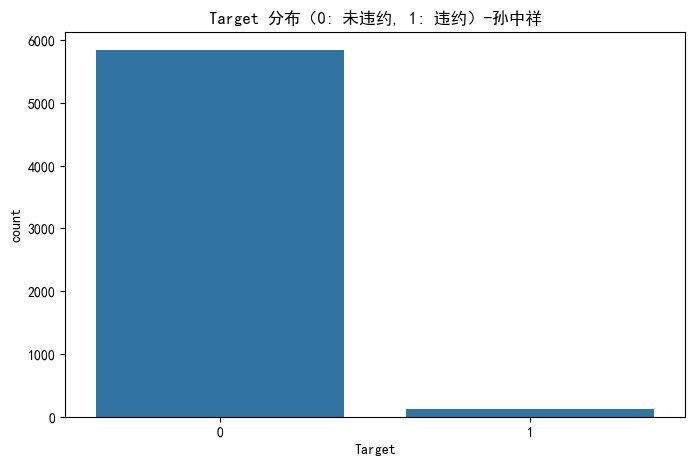

In [62]:
# 步骤 3：查看 Target 分布
target_counts = df["Target"].value_counts()
target_ratio = df["Target"].value_counts(normalize=True)

print("Target 分布统计（0: 未违约, 1: 违约）:")
print("数量统计:\n", target_counts)
print("\n比例分布:\n", target_ratio)

# 可视化分布
import matplotlib.pyplot as plt
import seaborn as sns

# 全局设置（解决中文乱码 + 负号显示）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 你的绘图代码
plt.figure(figsize=(8, 5))
sns.countplot(x="Target", data=df)
plt.title("Target 分布（0: 未违约, 1: 违约）-孙中祥")
plt.show()

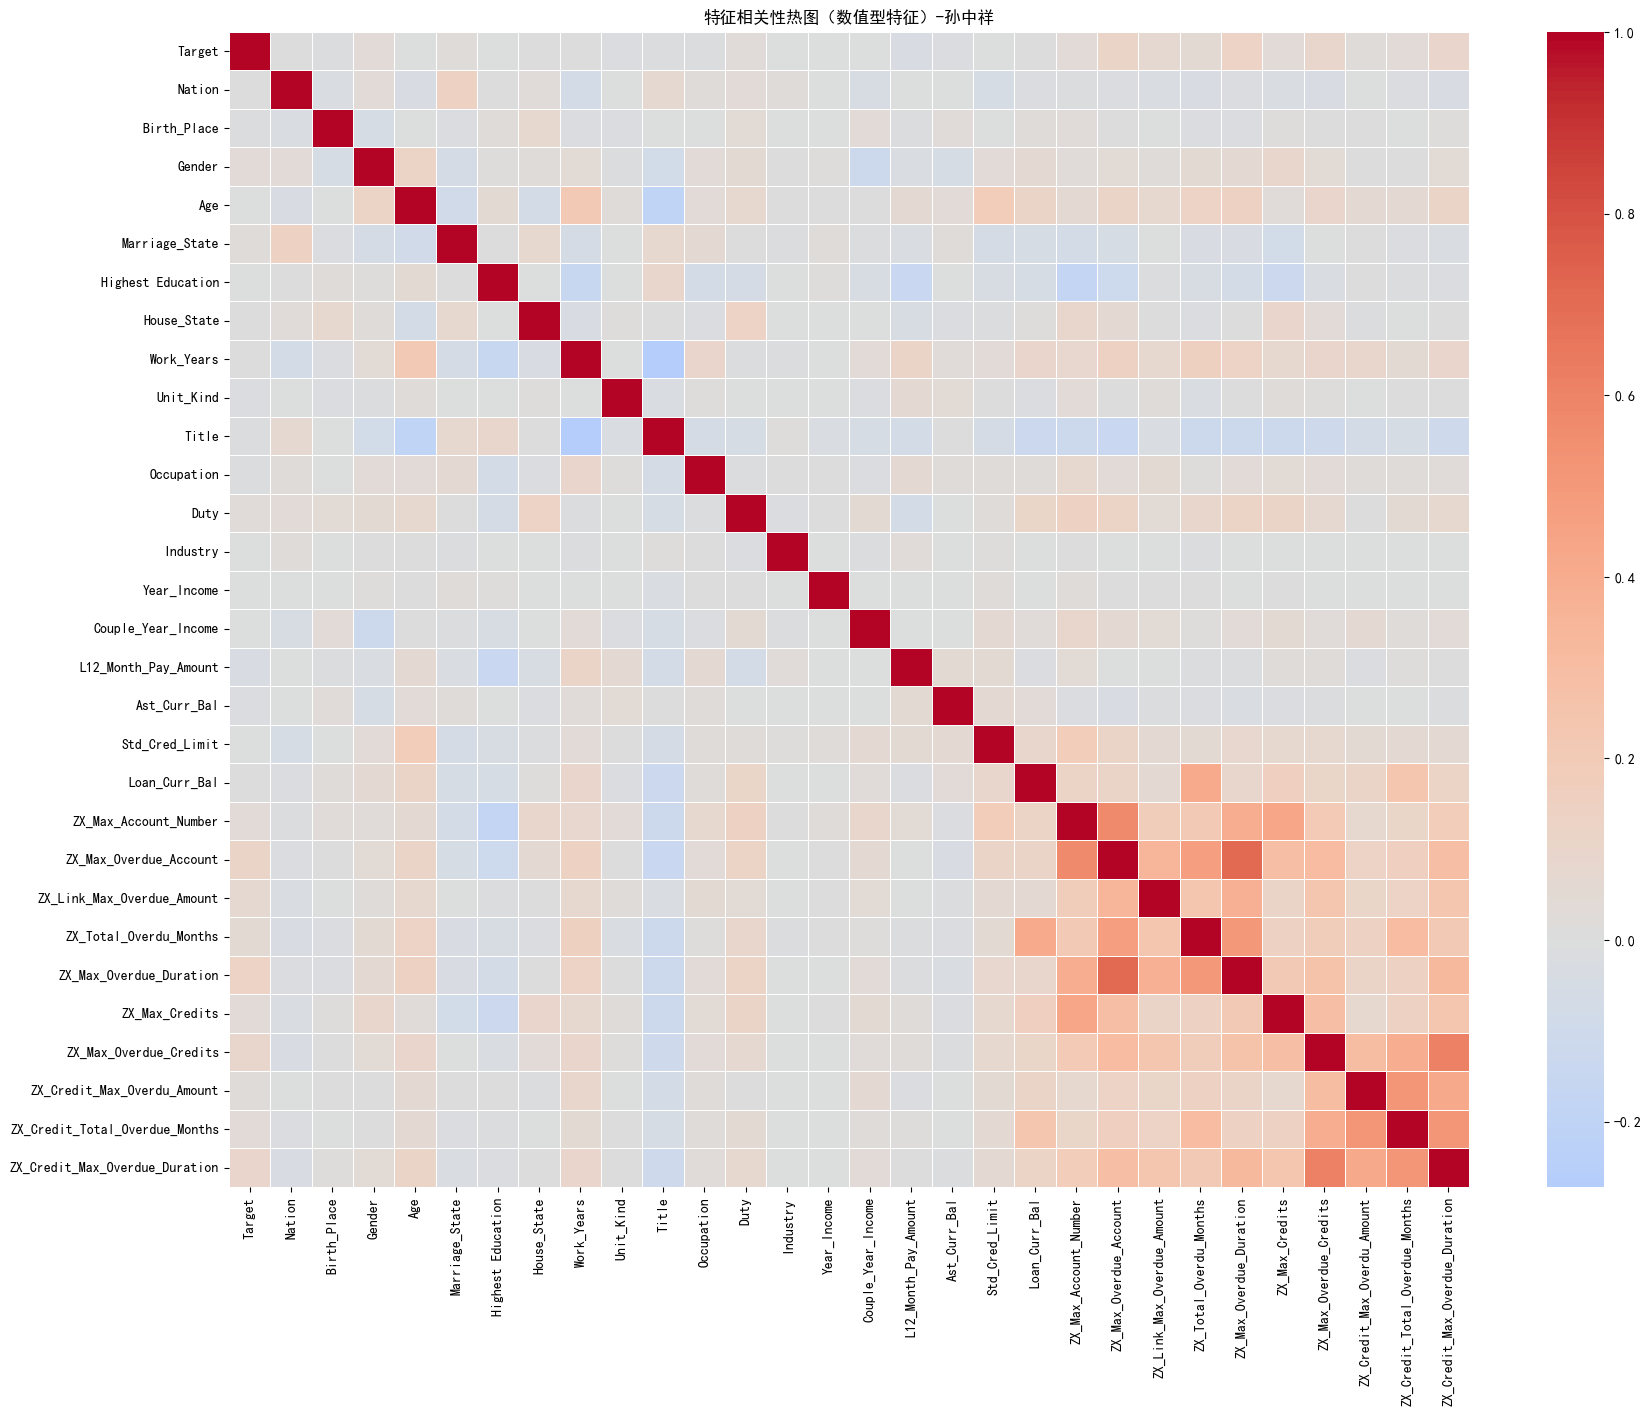

In [63]:
# 步骤4：可视化特征相关性
plt.figure(figsize=(20, 15))
#print(df.dtypes)
# 由于corr函数只能处理数值型数据，所以仅选择数值型列计算相关性
numeric_df = df.select_dtypes(include=[np.number])
# 2. 处理异常值
numeric_df = (
    numeric_df
    .replace([np.inf, -np.inf], np.nan)  # 替换无限值
    .fillna(0)                           # 填充 NaN
    .loc[:, ~numeric_df.columns.duplicated()]  # 删除重复列
)

# 3. 检查常数列并删除
constant_cols = numeric_df.columns[numeric_df.std() == 0]
numeric_df = numeric_df.drop(columns=constant_cols)
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    center=0,
    annot=False,
    linewidths=0.5
)
plt.title("特征相关性热图（数值型特征）-孙中祥")
plt.show()

In [24]:
# 步骤5：处理相关性过高的特征对
# 计算特征之间的相关性矩阵
numeric_df = df.select_dtypes(include=[np.number])  # 选择数值型特征
corr_matrix = numeric_df.corr()

cols_pair_to_drop = []
# 遍历相关性矩阵，找出相关性过高的特征对
for index_ in corr_matrix.index:
    for col_ in corr_matrix.columns:
        if corr_matrix.loc[index_, col_] >= 0.8 and index_ != col_ and (col_, index_) not in cols_pair_to_drop:
            cols_pair_to_drop.append((index_, col_))
            # 打印出相关性过高的特征对
            print(f"特征 {index_} 和 {col_} 的相关性为 {corr_matrix.loc[index_, col_]:.4f}")

# 从每个特征对中选择一个特征进行删除
cols_to_drop = np.unique([col[1] for col in cols_pair_to_drop])
print(f"将删除的特征列：{cols_to_drop}")
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

特征 ZX_Max_Account_Number 和 ZX_Max_Link_Banks 的相关性为 0.9414
特征 ZX_Max_Credits 和 ZX_Max_Credit_Banks 的相关性为 0.8040
将删除的特征列：['ZX_Max_Credit_Banks' 'ZX_Max_Link_Banks']


,Cust_No,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,...,ZX_Max_Account_Number,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
0,0,0,1.0,330621,1,41,20.0,61.0,NaN,0,...,0,1,8,1,1,0,0,0,0,0
1,1,0,1.0,330621,1,41,20.0,71.0,1.0,0,...,2,1,0,3,1,2,0,0,0,0
2,2,0,1.0,330621,1,55,40.0,71.0,1.0,0,...,2,1,0,2,1,1,0,0,0,0
3,3,0,1.0,330621,1,41,20.0,61.0,1.0,68624,...,1,0,0,0,0,1,0,0,0,0
4,4,0,1.0,330621,0,40,99.0,90.0,1.0,0,...,4,0,0,0,0,0,0,0,0,0


In [60]:
# 步骤6：查看缺失率最高的前15个特征及其对应的缺失率
# 计算各列的缺失率
null_counts = df.isnull().sum()
total_rows = df.shape[0]
missing_rates = (null_counts / total_rows).sort_values(ascending=False)

# 获取缺失率最高的前15个特征
top_missing = missing_rates.head(15)

# 打印结果
print("缺失率最高的前15个特征及其缺失率：")
print(top_missing)

缺失率最高的前15个特征及其缺失率：
Target                            0.0
L12_Month_Pay_Amount              0.0
ZX_Credit_Total_Overdue_Months    0.0
ZX_Credit_Max_Overdu_Amount       0.0
ZX_Max_Overdue_Credits            0.0
ZX_Max_Credits                    0.0
ZX_Max_Overdue_Duration           0.0
ZX_Total_Overdu_Months            0.0
ZX_Link_Max_Overdue_Amount        0.0
ZX_Max_Overdue_Account            0.0
ZX_Max_Account_Number             0.0
Loan_Curr_Bal                     0.0
Std_Cred_Limit                    0.0
Ast_Curr_Bal                      0.0
Couple_L12_Month_Pay_Amount       0.0
dtype: float64


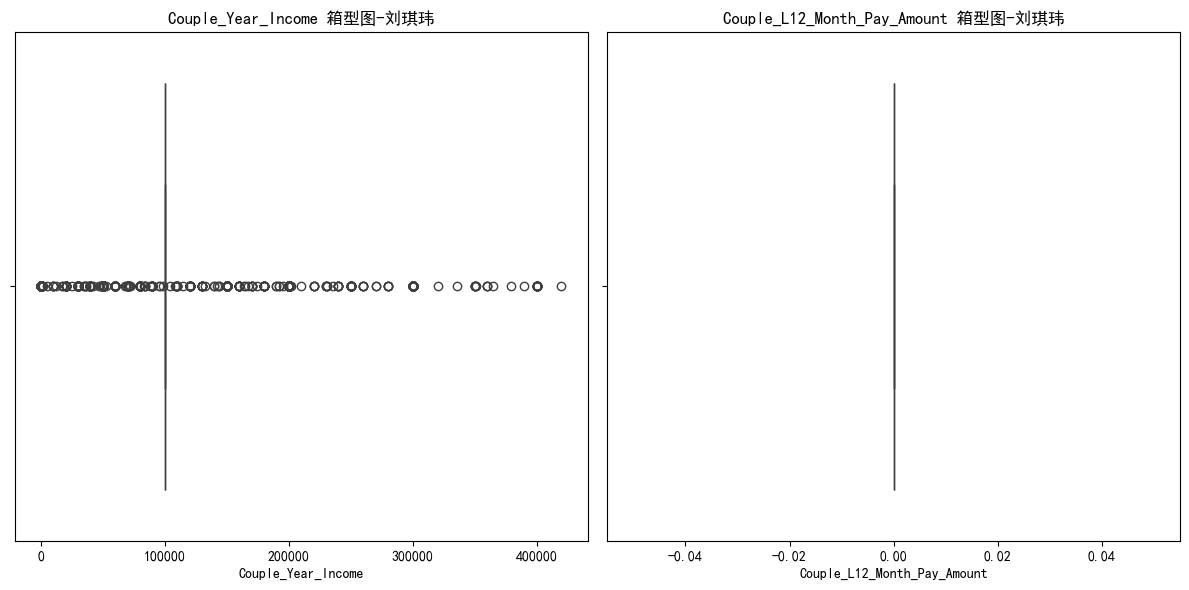

In [61]:
# 第七步：针对 Couple_Year_Income 和 Couple_L12_Month_Pay_Amount 制作箱型图
plt.figure(figsize=(12, 6))

# 绘制 Couple_Year_Income 的箱型图
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Couple_Year_Income'].dropna())
plt.title('Couple_Year_Income 箱型图-刘琪玮')

# 绘制 Couple_L12_Month_Pay_Amount 的箱型图
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Couple_L12_Month_Pay_Amount'].dropna())
plt.title('Couple_L12_Month_Pay_Amount 箱型图-刘琪玮')

plt.tight_layout()
plt.show()

In [28]:
# 第八步：使用IQR方法筛选Couple_Year_Income异常值
item = 'Couple_Year_Income'

# 计算第1四分位数（Q1）和第3四分位数（Q3）
Q1 = df[item].quantile(0.25)
Q3 = df[item].quantile(0.75)

# 计算IQR（四分位距）
IQR = Q3 - Q1

# 定义异常值的下限和上限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 筛选出异常值
abnormal_L = df[item] < lower_bound
abnormal_U = df[item] > upper_bound

# 获取异常值的索引
abnormal_indices = df[abnormal_L | abnormal_U].index

# 打印异常值的数量
print(f"{item}中有{len(abnormal_indices)}个异常值")

Couple_Year_Income中有131个异常值


In [29]:
# 第九步：删除Couple_Year_Income的异常值并用中位数填补缺失值
item = 'Couple_Year_Income'

# 删除异常值
df.drop(abnormal_indices, inplace=True)

# 用中位数填补缺失值
median_value = df[item].median()
df[item].fillna(median_value, inplace=True)

# 打印处理后的缺失值情况
print(f"{item}处理后的缺失值数量：{df[item].isnull().sum()}")

Couple_Year_Income处理后的缺失值数量：0


In [30]:
# 第十步：使用IQR方法筛选Couple_L12_Month_Pay_Amount异常值
item = 'Couple_L12_Month_Pay_Amount'

# 计算第1四分位数（Q1）和第3四分位数（Q3）
Q1 = df[item].quantile(0.25)
Q3 = df[item].quantile(0.75)

# 计算IQR
IQR = Q3 - Q1

# 定义异常值的上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 筛选异常值
abnormal_L = df[item] < lower_bound
abnormal_U = df[item] > upper_bound

# 获取异常值索引
abnormal_indices_amount = df[abnormal_L | abnormal_U].index

# 打印异常值数量
print(f"{item}中有{len(abnormal_indices_amount)}个异常值")

Couple_L12_Month_Pay_Amount中有372个异常值


In [31]:
# 第十一步：删除Couple_L12_Month_Pay_Amount的异常值并用中位数填补缺失值
item = 'Couple_L12_Month_Pay_Amount'

# 删除异常值
df.drop(abnormal_indices_amount, inplace=True)

# 用中位数填补缺失值
median_value = df[item].median()
df[item].fillna(median_value, inplace=True)

# 打印处理后的缺失值情况
print(f"{item}处理后的缺失值数量：{df[item].isnull().sum()}")

Couple_L12_Month_Pay_Amount处理后的缺失值数量：0


In [32]:
# 第十二步：找出仍有少量缺失值的特征列名
null_col = df.columns[df.isnull().any()].tolist()
print(f"仍有少量缺失值的特征列：{null_col}")

仍有少量缺失值的特征列：['Nation', 'Marriage_State', 'Highest Education', 'House_State', 'Unit_Kind', 'Title', 'Occupation', 'Duty', 'Industry']


In [33]:
# 第十三步：使用众数填充仍有少量缺失值的特征列
for col in null_col:
    # 找出众数
    mode_value = df[col].mode()[0]
    # 用众数填充缺失值
    df[col].fillna(mode_value, inplace=True)
# 查看填充后的缺失值情况
print("填充后的缺失值情况：")
print(df.isnull().sum())

填充后的缺失值情况：
Cust_No                           0
Target                            0
Nation                            0
Birth_Place                       0
Gender                            0
Age                               0
Marriage_State                    0
Highest Education                 0
House_State                       0
Work_Years                        0
Unit_Kind                         0
Title                             0
Occupation                        0
Duty                              0
Industry                          0
Year_Income                       0
Couple_Year_Income                0
L12_Month_Pay_Amount              0
Couple_L12_Month_Pay_Amount       0
Ast_Curr_Bal                      0
Std_Cred_Limit                    0
Loan_Curr_Bal                     0
ZX_Max_Account_Number             0
ZX_Max_Overdue_Account            0
ZX_Link_Max_Overdue_Amount        0
ZX_Total_Overdu_Months            0
ZX_Max_Overdue_Duration           0
ZX_Max_Credits   

In [34]:
# 第十四步：删除无分类意义的特征列Cust_No
if 'Cust_No' in df.columns:
    df.drop('Cust_No', axis=1, inplace=True)
else:
    print("列'Cust_No'不存在于数据框中，无需删除。")

# 查看删除后的数据框
df.head()

,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Unit_Kind,...,ZX_Max_Account_Number,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
2,0,1.0,330621,1,55,40.0,71.0,1.0,0,1175,...,2,1,0,2,1,1,0,0,0,0
3,0,1.0,330621,1,41,20.0,61.0,1.0,68624,1175,...,1,0,0,0,0,1,0,0,0,0
4,0,1.0,330621,0,40,99.0,90.0,1.0,0,1000,...,4,0,0,0,0,0,0,0,0,0
6,0,1.0,330621,1,45,20.0,71.0,1.0,0,1000,...,9,1,23,3,1,2,0,0,0,0
7,0,1.0,330421,0,32,20.0,21.0,1.0,0,1000,...,12,1,1,3,1,1,0,0,0,0


In [35]:
# 第十五步：对剩余的名称型特征进行标签编码
# 查看数据框中剩余的名称型特征
con_col = []
for col in df.columns:
    if df.dtypes[col] == object:  # 直接使用 object 替代 np.object
        con_col.append(col)
print(f"剩余的名称型特征列：{con_col}")

# 对每个名称型特征进行标签编码
for col in con_col:
    df[col], _ = pd.factorize(df[col])

# 查看标签编码后的数据框
df.head()

剩余的名称型特征列：['Unit_Kind', 'Occupation']


,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Unit_Kind,...,ZX_Max_Account_Number,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
2,0,1.0,330621,1,55,40.0,71.0,1.0,0,0,...,2,1,0,2,1,1,0,0,0,0
3,0,1.0,330621,1,41,20.0,61.0,1.0,68624,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1.0,330621,0,40,99.0,90.0,1.0,0,1,...,4,0,0,0,0,0,0,0,0,0
6,0,1.0,330621,1,45,20.0,71.0,1.0,0,1,...,9,1,23,3,1,2,0,0,0,0
7,0,1.0,330421,0,32,20.0,21.0,1.0,0,1,...,12,1,1,3,1,1,0,0,0,0


In [36]:
# 第十六步：使用分层抽样切分数据集
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

# 假设 df 是已预处理的数据框
x_cols = [col for col in df.columns if col != 'Target']
y_col = 'Target'

# 使用分层抽样切分数据集
X_train, X_test, y_train, y_test = train_test_split(
    df[x_cols],
    df[y_col],
    test_size=0.1,  # 测试集占10%
    random_state=42,  # 随机种子确保结果可重复
    shuffle=True,  # 打乱数据
    stratify=df[y_col]  # 按Target列的类别比例进行分层抽样
)

# 输出训练集和测试集中目标变量的分布
print('训练集中目标变量的分布：', Counter(y_train))
print('测试集中目标变量的分布：', Counter(y_test))

训练集中目标变量的分布： Counter({0: 5259, 1: 104})
测试集中目标变量的分布： Counter({0: 584, 1: 12})


In [37]:
# 第十七步：标准化
from sklearn.preprocessing import StandardScaler

# 初始化标准化工具
scaler = StandardScaler()

# 对训练集和测试集的特征进行标准化
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [38]:
# 第十八步：引入逻辑回归和特征选择的库，并使用逻辑回归对标准化后的数据进行建模和评估
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# 声明逻辑回归模型
lr_model = LogisticRegression(max_iter=10000)

# 使用训练集数据训练模型
lr_model.fit(X_train_std, y_train)

# 对测试集进行预测
y_test_pred = lr_model.predict(X_test_std)

# 评估模型效果
print('accuracy of lr_model score:', accuracy_score(y_test, y_test_pred))
print('f1_score of lr_model score:', f1_score(y_test, y_test_pred))
print('recall_score of lr_model score:', recall_score(y_test, y_test_pred))
print('precision_score of lr_model score:', precision_score(y_test, y_test_pred))

accuracy of lr_model score: 0.9798657718120806
f1_score of lr_model score: 0.0
recall_score of lr_model score: 0.0
precision_score of lr_model score: 0.0


In [39]:
# 第十九步：对训练集进行过采样并使用逻辑回归建模，进行交叉验证
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import cross_val_score

# 初始化过采样工具
smote_model = SMOTE(random_state=7, sampling_strategy=0.5)  # 过采样比例为2:1

# 对训练集进行过采样
X_train_res, y_train_res = smote_model.fit_resample(X_train_std, y_train)

# 打印过采样后的数据集形状
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

# 使用过采样后的训练集进行交叉验证
cv_scores = cross_val_score(lr_model, X_train_res, y_train_res,  cv=5)

# 打印交叉验证分数
print('cross validation score of model version1 {}'.format(cv_scores))

Resampled dataset shape Counter({0: 5259, 1: 2629})
cross validation score of model version1 [0.74524715 0.74461343 0.73574144 0.72352568 0.72986684]


In [40]:
# 步骤20-22：逻辑回归参数调优及测试集评估
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# 初始化逻辑回归模型（指定随机种子）
logreg = LogisticRegression(random_state=42, max_iter=1000)

# 参数网格（调节 C 和 solver）
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # 正则化强度的倒数
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag']  # 优化算法
}

# 网格搜索配置（使用过采样后的数据）
grid_search = GridSearchCV(
    estimator=logreg, 
    param_grid=param_grid, 
    scoring='f1',  # 实验要求使用 F1 分数
    cv=5,          # 5折交叉验证
    verbose=1      # 打印进度
)

# 执行搜索（使用过采样后的训练数据）
grid_search.fit(X_train_res, y_train_res)

# 输出最佳参数和 F1 分数
print("最佳参数组合：", grid_search.best_params_)
print("最佳F1分数（交叉验证）：", grid_search.best_score_)

# 使用最佳模型预测测试集
best_logreg = grid_search.best_estimator_
y_test_pred = best_logreg.predict(X_test_std)  # X_test_std 是步骤17标准化后的测试集

# 评估测试集效果
print('\n逻辑回归模型在测试集上的效果：')
print('准确率 (Accuracy):', accuracy_score(y_test, y_test_pred))
print('精确率 (Precision):', precision_score(y_test, y_test_pred))
print('召回率 (Recall):', recall_score(y_test, y_test_pred))
print('F1分数 (F1 Score):', f1_score(y_test, y_test_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
最佳参数组合： {'C': 10.0, 'solver': 'liblinear'}
最佳F1分数（交叉验证）： 0.5034023520125194

逻辑回归模型在测试集上的效果：
准确率 (Accuracy): 0.8825503355704698
精确率 (Precision): 0.06060606060606061
召回率 (Recall): 0.3333333333333333
F1分数 (F1 Score): 0.10256410256410256


In [41]:
# 第二十三步：使用随机森林对标准化后的数据进行建模并评估效果
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 初始化随机森林模型，设置类别权重以处理类别不平衡
rf_model = RandomForestClassifier(class_weight='balanced', random_state=10)

# 使用训练集数据训练模型
rf_model.fit(X_train_std, y_train)

# 对测试集进行预测
y_test_pred_rf = rf_model.predict(X_test_std)

# 评估模型效果
print('随机森林模型在测试集上的效果：')
print('准确率 (Accuracy):', accuracy_score(y_test, y_test_pred_rf))
print('精确率 (Precision):', precision_score(y_test, y_test_pred_rf))
print('召回率 (Recall):', recall_score(y_test, y_test_pred_rf))
print('F1分数 (F1 Score):', f1_score(y_test, y_test_pred_rf))

随机森林模型在测试集上的效果：
准确率 (Accuracy): 0.9832214765100671
精确率 (Precision): 1.0
召回率 (Recall): 0.16666666666666666
F1分数 (F1 Score): 0.2857142857142857


In [42]:
# 第二十四步：对随机森林的class_weight参数进行调优

# 参数网格，对class_weight进行搜索
param_test0 = {'class_weight':[{0:1,1:3},{0:1,1:5},{0:1,1:10},{0:1,1:20},'balanced']}

# 使用GridSearchCV进行网格搜索和交叉验证
gsearch0 = GridSearchCV(
    estimator = rf_model, 
    param_grid = param_test0, 
    cv=5
    )
gsearch0.fit(X_train_std,y_train)

# 输出最佳参数组合及其对应的F1分数
print('best params:{}'.format(gsearch0.best_params_))
print('best score:{}'.format(gsearch0.best_score_))

best params:{'class_weight': {0: 1, 1: 5}}
best score:0.9809809294626588


In [43]:
# 第二十五步：对随机森林模型的n_estimators参数进行调优
# 参数网格
param_test1 = {'n_estimators':range(10,101,10)}

# 进行网格搜索和交叉验证
gsearch1 = GridSearchCV(
    estimator = gsearch0.best_estimator_, 
    param_grid = param_test1, 
    cv=5
    )
gsearch1.fit(X_train_std,y_train)

# 输出最佳参数及其对应的F1分数
print('best params:{}'.format(gsearch1.best_params_))
print('best score:{}'.format(gsearch1.best_score_))

best params:{'n_estimators': 20}
best score:0.9809809294626588


In [26]:
# 步骤26：参数调优后的随机森林模型评估
# 获取最终最佳模型（包含调优后的 class_weight 和 n_estimators）
best_rf_model = gsearch1.best_estimator_

# 对测试集进行预测
y_test_pred_rf_tuned = best_rf_model.predict(X_test_std)

# 输出评估指标
print('\n调优后的随机森林模型在测试集上的效果：')
print('准确率 (Accuracy):', accuracy_score(y_test, y_test_pred_rf_tuned))
print('精确率 (Precision):', precision_score(y_test, y_test_pred_rf_tuned))
print('召回率 (Recall):', recall_score(y_test, y_test_pred_rf_tuned))
print('F1分数 (F1 Score):', f1_score(y_test, y_test_pred_rf_tuned))


调优后的随机森林模型在测试集上的效果：
准确率 (Accuracy): 0.9832214765100671
精确率 (Precision): 1.0
召回率 (Recall): 0.16666666666666666
F1分数 (F1 Score): 0.2857142857142857
